In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('fuel_consumption_dataset.csv')


In [3]:
dataset.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
numerical_features=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
categorical_features=['TRANSMISSION','FUELTYPE']


In [5]:
dataset=dataset[numerical_features + categorical_features+['CO2EMISSIONS']]

In [6]:
dataset

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TRANSMISSION,FUELTYPE,CO2EMISSIONS
0,2.0,4,8.5,AS5,Z,196
1,2.4,4,9.6,M6,Z,221
2,1.5,4,5.9,AV7,Z,136
3,3.5,6,11.1,AS6,Z,255
4,3.5,6,10.6,AS6,Z,244
...,...,...,...,...,...,...
1062,3.0,6,11.8,AS6,X,271
1063,3.2,6,11.5,AS6,X,264
1064,3.0,6,11.8,AS6,X,271
1065,3.2,6,11.3,AS6,X,260


In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
categorical_encoded=encoder.fit_transform(dataset[categorical_features])
categorical_df=pd.DataFrame(categorical_encoded,columns=encoder.get_feature_names_out(categorical_features))
dataset=pd.concat([dataset[numerical_features] ,categorical_df,dataset['CO2EMISSIONS']],axis=1)

In [9]:
dataset

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z,CO2EMISSIONS
0,2.0,4,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,196
1,2.4,4,9.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,221
2,1.5,4,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,136
3,3.5,6,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255
4,3.5,6,10.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,6,11.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,271
1063,3.2,6,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,264
1064,3.0,6,11.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,271
1065,3.2,6,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,260


In [10]:
x = dataset.iloc[:, 0 :-1]
y = dataset.iloc[:, -1]
print(x)
print(y)


      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  TRANSMISSION_A5  \
0            2.0          4                   8.5              0.0   
1            2.4          4                   9.6              0.0   
2            1.5          4                   5.9              0.0   
3            3.5          6                  11.1              0.0   
4            3.5          6                  10.6              0.0   
...          ...        ...                   ...              ...   
1062         3.0          6                  11.8              0.0   
1063         3.2          6                  11.5              0.0   
1064         3.0          6                  11.8              0.0   
1065         3.2          6                  11.3              0.0   
1066         3.2          6                  12.8              0.0   

      TRANSMISSION_A6  TRANSMISSION_A7  TRANSMISSION_A8  TRANSMISSION_A9  \
0                 0.0              0.0              0.0              0.0   
1      

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x)
print(y)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  TRANSMISSION_A5  \
0            2.0          4                   8.5              0.0   
1            2.4          4                   9.6              0.0   
2            1.5          4                   5.9              0.0   
3            3.5          6                  11.1              0.0   
4            3.5          6                  10.6              0.0   
...          ...        ...                   ...              ...   
1062         3.0          6                  11.8              0.0   
1063         3.2          6                  11.5              0.0   
1064         3.0          6                  11.8              0.0   
1065         3.2          6                  11.3              0.0   
1066         3.2          6                  12.8              0.0   

      TRANSMISSION_A6  TRANSMISSION_A7  TRANSMISSION_A8  TRANSMISSION_A9  \
0                 0.0              0.0              0.0              0.0   
1      

In [12]:
from sklearn.preprocessing import StandardScaler
numerical_data=dataset[numerical_features]
scaler = StandardScaler().fit(numerical_data)
normalized_numerical_data=scaler.transform(numerical_data)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
print("Coefficients:",regressor.coef_," Constant:",regressor.intercept_)


Coefficients: [   1.08977446    1.18479523   20.86248187    6.91879677    4.75814724
    6.99587114    6.01847261    4.56728132    0.53841714    6.76247194
    5.0232405     5.12359955    5.25205219    5.16002445    5.7850199
    6.50101778    5.3314091     0.98619442    1.28158209   -0.36489491
    0.20925402    3.61649552    4.25821994    3.81257355 -143.6277919
  -28.77658223  -29.46223381]  Constant: 37.759772566965836


In [15]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

      Actual   Predicted
766      356  352.923149
204      209  210.944562
629      230  229.720796
897      212  215.306775
711      168  173.902949
...      ...         ...
822      198  196.600846
1029     221  220.254242
798      191  192.697106
803      184  185.938434
251      184  187.307935

[214 rows x 2 columns]


In [16]:
from sklearn import metrics 
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
      


Mean absolute error: 3.2677127267001005
Mean squared error: 24.813664592790666


In [17]:
df.head()

,Actual,Predicted
766,356,352.923149
204,209,210.944562
629,230,229.720796
897,212,215.306775
711,168,173.902949


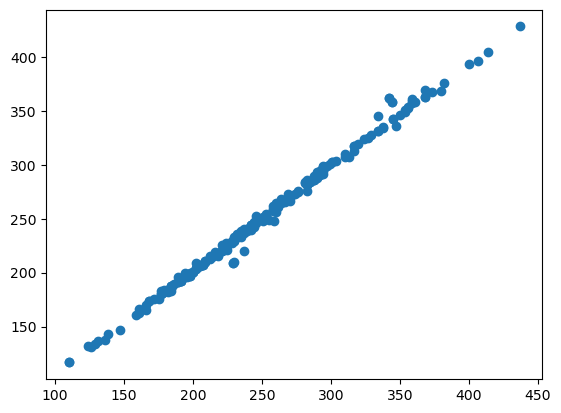

In [18]:
plt.scatter(y_test,y_pred)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score
mae = mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Absolute error (MAE):",mae)
print("Mean Squared error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R2 Score:",r2)

Mean Absolute error (MAE): 3.2677127267001005
Mean Squared error (MSE): 24.813664592790666
Root Mean Squared Error (RMSE): 4.981331608394553
R2 Score: 0.9941220537851544
